In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tslearn.metrics import dtw, soft_dtw
from sklearn.metrics import accuracy_score
from scipy.spatial import distance as dist

from reader import get_x_label, get_class_x
from average import amplitude_avg, dtw_avg, soft_dtw_avg

In [2]:
file_list = ['Gun_Point', 'Beef', 'FaceFour', 'synthetic_control', 'OSULeaf', 'yoga', 'FISH',
             'Coffee', 'Trace', 'FaceAll', 'Two_Patterns', 'Adiac', 'Lightning7', 'OliveOil',
             '50words', 'CBF', 'SwedishLeaf']
file_list.sort()

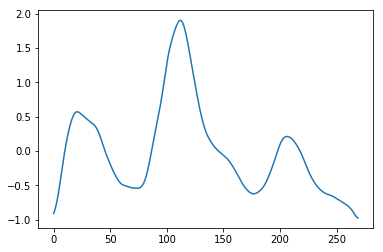

In [7]:
class_x = get_class_x('50words' + '_TRAIN')
class_avg = amplitude_avg(class_x)
plt.plot(class_avg[0])

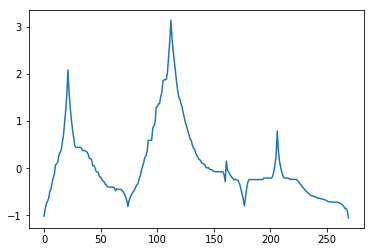

In [5]:
class_avg = dtw_avg(class_x)
plt.plot(class_avg[0])

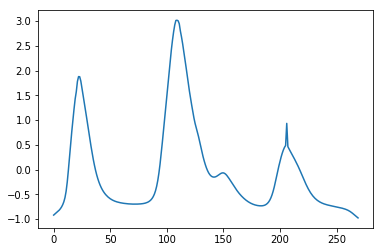

In [6]:
class_avg = soft_dtw_avg(class_x)
plt.plot(class_avg[0])

In [3]:
def predict_class(test_x, class_avg):
    predict = []
    for i in range(test_x.shape[0]): 
        min_distance = 10000000
        nearest_class = -1
        for j in range(class_avg.shape[0]):
#             distance = dist.euclidean(test_x[i], class_avg[j])
            distance = dtw(test_x[i], class_avg[j])
#             distance = soft_dtw(test_x[i], class_avg[j])
            if distance < min_distance:
                min_distance = distance
                nearest_class = j
        predict.append(nearest_class)
    return predict

In [5]:
accuracies = []
for file_name in file_list[6:]:
    class_x = get_class_x(file_name + '_TRAIN')
    class_avg = dtw_avg(class_x)
    test_x, test_label = get_x_label(file_name + '_TEST')
    predict = predict_class(test_x, class_avg)
    accuracy = accuracy_score(test_label-1, predict)
    print(accuracy)
    accuracies.append(accuracy)

0.7964497041420119
0.8522727272727273
0.7
0.6575342465753424
0.4380165289256198
0.8666666666666667
0.6816
0.97
0.975
0.98


KeyboardInterrupt: 

In [ ]:
print('Finish')